## Simulation of tracer partices in wall-bounded flow



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pystokes

In [2]:
b = 1    # radiud
N = 2    # # particles
eta = 1
wRbm = pystokes.wallBounded.Rbm(b, N, eta)
ff   = pystokes.forceFields.Forces(N)

In [3]:
def tracerTraj(r, F, dt, Nt):
    'code to compute tracer velocity'
    v = np.zeros(3*N)
    xt = np.zeros(Nt)
    yt = np.zeros(Nt)
    zt = np.zeros(Nt)
    xt[0] = r[0   + 1]
    yt[0] = r[N   + 1]
    zt[0] = r[2*N + 1]

    lje, ljr, wlje, wljr = 1, 2.2, 1, .5
    for i in range(Nt-1):
        ff.lennardJonesWall(F, r, lje, ljr, wlje, wljr)
        wRbm.mobilityTT(v, r, F)
        xt[i+1] = xt[i] + dt*v[0    + 1]  
        yt[i+1] = yt[i] + dt*v[N   + 1]  
        zt[i+1] = zt[i] + dt*v[2*N + 1]  
        ## force at each time step
        r[0  +1] = xt[i+1]
        r[N  +1] = yt[i+1]
        r[2*N+1] = zt[i+1]

        # resettting
        v = v*0
        F = F*0
        F[4]=f0
    return xt, yt, zt

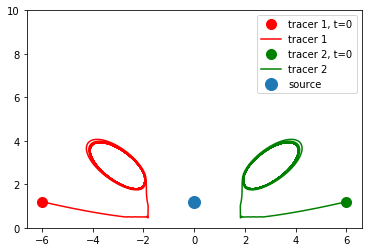

In [4]:
dt, Nt = 1, 10000
r = np.zeros(3*N)
F = np.zeros(3*N)

# first tracer
h, f0 = 1.2, 10
r[0], r[2], r[4] = 0, 0, h
r[1], r[3], r[5] = -6, 0, h
F[4] = f0
xt1, yt1, zt1 = tracerTraj(r, F, dt, Nt)

# second tracer
h, f0 = 1.2, 10
r[0], r[2], r[4] = 0, 0, h
r[1], r[3], r[5] = 6, 0, h
F[4] = f0
xt2, yt2, zt2 = tracerTraj(r, F, dt, Nt)

## plot
plt.plot(xt1[0], zt1[0], 'ro', ms=10, label='tracer 1, t=0')
plt.plot(xt1, zt1, 'r-', label='tracer 1')

plt.plot(xt2[0], zt2[0], 'go', ms=10, label='tracer 2, t=0')
plt.plot(xt2, zt2, 'g-', label='tracer 2')

plt.plot(r[0], r[4], 'o', ms=12, label='source')
plt.legend(); plt.ylim([0, 10]);

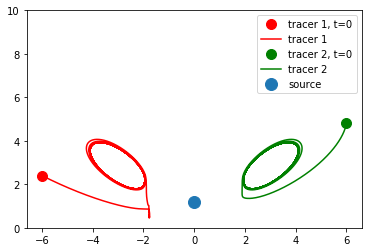

In [5]:
dt, Nt = 1, 10000
r = np.zeros(3*N)
F = np.zeros(3*N)

# first tracer
h, f0 = 1.2, 10
r[0], r[2], r[4] = 0, 0, h
r[1], r[3], r[5] = -6, 0, 2*h
F[4] = f0
xt1, yt1, zt1 = tracerTraj(r, F, dt, Nt)

# second tracer
h, f0 = 1.2, 10
r[0], r[2], r[4] = 0, 0, h
r[1], r[3], r[5] = 6, 0,4*h
F[4] = f0
xt2, yt2, zt2 = tracerTraj(r, F, dt, Nt)

## plot
plt.plot(xt1[0], zt1[0], 'ro', ms=10, label='tracer 1, t=0')
plt.plot(xt1, zt1, 'r-', label='tracer 1')

plt.plot(xt2[0], zt2[0], 'go', ms=10, label='tracer 2, t=0')
plt.plot(xt2, zt2, 'g-', label='tracer 2')

plt.plot(r[0], r[4], 'o', ms=12, label='source')
plt.legend(); plt.ylim([0, 10]);

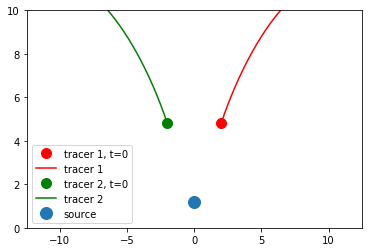

In [6]:
dt, Nt = 1, 10000
r = np.zeros(3*N)
F = np.zeros(3*N)

# first tracer
h, f0 = 1.2, 10
r[0], r[2], r[4] = 0, 0, h
r[1], r[3], r[5] = 2, 0, 4*h
F[4] = f0
xt1, yt1, zt1 = tracerTraj(r, F, dt, Nt)

# second tracer
h, f0 = 1.2, 10
r[0], r[2], r[4] = 0, 0, h
r[1], r[3], r[5] = -2, 0,4*h
F[4] = f0
xt2, yt2, zt2 = tracerTraj(r, F, dt, Nt)

## plot
plt.plot(xt1[0], zt1[0], 'ro', ms=10, label='tracer 1, t=0')
plt.plot(xt1, zt1, 'r-', label='tracer 1')

plt.plot(xt2[0], zt2[0], 'go', ms=10, label='tracer 2, t=0')
plt.plot(xt2, zt2, 'g-', label='tracer 2')

plt.plot(r[0], r[4], 'o', ms=12, label='source')
plt.legend(); plt.ylim([0, 10]);